# Lecture 4.1: More about Data Transformation

<div style="border: 1px double black; padding: 10px; margin: 10px">

**Goals for today's lecture:**
* Consolidate knowledge we have learned so far
* Learn more about `group_by` and summarize
    
</div>


In [1]:
library(tidyverse)
library(nycflights13)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Thus far, we have learnt several functions that are useful for data transformation:

- `filter`, filtering the rows based on some criteria
- `select`, select columns of interest
- `mutate`, create new variables 
- `summarize`, create a summary statistic of a variable

<div style="border: 1px double black; padding: 10px; margin: 10px">

**One student pointed out that there is a statement in Lecture 3.2 that is not concise**. 
 
* Previously the statement was the following:

`summarize()` applies the summary function to each group of data. Remember that it always returns **one row per group**.

* The more precise statement should be

`summarize()` applies the summary function to each group of data. It returns one row per group whena all functions in the arguments of `summarize()` return single values for vectors. 
</div>




<div style="border: 1px double black; padding: 10px; margin: 10px">

**Why slice function does not work as intended after grouping?**. 
 
`slice(k)` is essentially listing the top `k` elements in your table, organized by group.  Since our table is grouped as one, `slice` will output the entire group for us. 

    
Instead, we should use the `ungroup` function to ungroup our data before applying `slice`. Here is the same example that we have gone through in Lecture 3.2. 
</div>




In [3]:
library(tidyverse)
library(nycflights13)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



#### Which day of the year is busiest, and at what airport?

In [4]:
group_by(flights, month, day, origin) %>% summarize(n_sched_departures = n()) %>% 
            arrange(desc(n_sched_departures))%>% print()

`summarise()` has grouped output by 'month', 'day'. You can override using the `.groups` argument.



# A tibble: 1,095 × 4
# Groups:   month, day [365]
   month   day origin n_sched_departures
   <int> <int> <chr>               <int>
 1     4    15 EWR                   377
 2     4    11 EWR                   376
 3     4    18 EWR                   376
 4     4    10 EWR                   375
 5     4    17 EWR                   375
 6     4    12 EWR                   374
 7     4    19 EWR                   374
 8     4    22 EWR                   372
 9     4    25 EWR                   372
10     4    29 EWR                   372
# … with 1,085 more rows


In [6]:
group_by(flights, month, day, origin) %>% summarize(n_sched_departures = n()) %>% 
            arrange(desc(n_sched_departures))%>% slice(1) %>% print

`summarise()` has grouped output by 'month', 'day'. You can override using the `.groups` argument.



# A tibble: 365 × 4
# Groups:   month, day [365]
   month   day origin n_sched_departures
   <int> <int> <chr>               <int>
 1     1     1 EWR                   305
 2     1     2 EWR                   350
 3     1     3 EWR                   336
 4     1     4 EWR                   339
 5     1     5 JFK                   302
 6     1     6 JFK                   307
 7     1     7 EWR                   342
 8     1     8 EWR                   334
 9     1     9 EWR                   336
10     1    10 EWR                   344
# … with 355 more rows


In [7]:
group_by(flights, month, day, origin) %>% summarize(n_sched_departures = n()) %>% 
            arrange(desc(n_sched_departures))%>% ungroup() %>%  slice(1) %>% print

`summarise()` has grouped output by 'month', 'day'. You can override using the `.groups` argument.



# A tibble: 1 × 4
  month   day origin n_sched_departures
  <int> <int> <chr>               <int>
1     4    15 EWR                   377


## Some Useful Functions in R for Data Transformation

R provides you with several in-built vectorized functions that can be used to create more complicated function. These include:

* **Arithmetic operators** `+, -, *, /, ^`
* **Modular arithmetic operators** `%/%` and `%%` 
* **Logarithms** `log()`, `log10()`, `log2()`
* **Offsets** `lag()` and `lead()`

To do a regular division, we use `/`.  To do an integer division, we use the code `%/%`. Integer division is a division in which the fractional part (remainder) is discarded.

In [2]:
4 / 3   
4 %/% 3 

[1] 1.333333

[1] 1

Sometimes you will find the modular operation `%%` useful.  This is outputting the fractional part of a division.  

In [3]:
1%%5 

[1] 1

In [4]:
3%%5

[1] 3

In [5]:
5%%5

[1] 0

In [8]:
1:20 %% 5

[1] 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0

The shorter argument 5 is extended to match length of longer argument

You may also find the function `lag` and `lead` useful.   For instance, `lag` computes a lagged version of a time series, shifting the time base back by a given number of observations.

In [10]:
(x <- 1:10)
lag(x) # you can also specify an argument -- read ?lag(x) 
lead(x)

[1]  1  2  3  4  5  6  7  8  9 10

[1] NA  1  2  3  4  5  6  7  8  9

[1]  2  3  4  5  6  7  8  9 10 NA

We also have:

* **Logical comparisons** `==, !=, <, <=, >, >=`
* **Cumulative aggregates** `cumsum(), cumprod(), cummin(), cummax()` (`dplyr` also provides `cummean()`)

In [8]:
5 < 5
1:10 < 11:20
1:10 < 5
21 < 11:20

[1] FALSE

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

[1]  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [9]:
(factorials <- cumprod(1:10))
cumsum(1:10)

[1]       1       2       6      24     120     720    5040   40320  362880
[10] 3628800

[1]  1  3  6 10 15 21 28 36 45 55

## Ranking functions
Sometimes, we want to *rank* our data by assigning integers for 1st place, 2nd place, and etc. The functions `dense_rank()`, `min_rank()`, and `row_number()` can be used for this purpose:

In [12]:
gpas = c(3.9, 3.8, 2.7, 3.8, 4.0, 4.0)
dense_rank(gpas)
min_rank(gpas)
row_number(gpas)

[1] 3 2 1 2 4 4

[1] 4 2 1 2 5 5

[1] 4 2 1 3 5 6

Note the differences in behavior: 
- The rankings from `dense_rank()` never have gaps.
- The rankings from `min_rank()` skips over 3rd place (because we have two entries tied for 2nd.)
- The rankings from `row_number()` break ties arbitrarily, so the first 4.0 GPA gets ranked 5th, and the second 4.0 GPA gets ranked 6th.

By default, the ranking functions rank lowest first. If we want to reverse that, and assign rank 1 to the highest entry, we can couple the ranking functionuse with the `desc()` function:

In [13]:
dense_rank(desc(gpas))
min_rank(desc(gpas))
row_number(desc(gpas))

[1] 2 3 4 3 1 1

[1] 3 4 6 4 1 1

[1] 3 4 6 5 1 2

In [12]:
(x <- sample(c(11, 12, 12, 14, 14, 14, 17, 21, 26, NA))) # returns a random permutation of the input
min_rank(x) # ranks with smallest value as rank 1
min_rank(desc(x)) # ranks with largest value as rank 1

[1] 14 12 NA 12 26 14 11 21 17 14

[1]  4  2 NA  2  9  4  1  8  7  4

[1]  4  7 NA  7  1  4  9  2  3  4

## More Exercise on Summary Function




Many summarization functions are available:

* Center: `mean(), median()`
* Spread: `sd(), IQR(), mad()`
* Range: `min(), max(), quantile()`
* Position: `first(), last(), nth()`
* Count: `n(), n_distinct()`
* Logical: `any(), all()`

Now, let us try to use some of the summarize functions to create a new table with the variables airports, total flights, mean distance, and standard deviation of the distance.  We want to sort the mean distance in descending order.   Let's try to guess which airport has the largest mean distance before we even proceed! 

In [21]:
# airports, total flights, mean distance, and standard deviation of distance
# sorted in descending order of mean distance
group_by(flights, dest) %>%
    summarize(count = n(), sd = sd(distance), mean_distance = mean(distance)) %>%
    arrange(desc(mean_distance)) %>% ungroup() %>% print

# A tibble: 105 × 4
   dest  count    sd mean_distance
   <chr> <int> <dbl>         <dbl>
 1 HNL     707 10.0          4973.
 2 ANC       8  0            3370 
 3 SFO   13331 10.2          2578.
 4 OAK     312  0            2576 
 5 SJC     329  0            2569 
 6 SMF     284  0            2521 
 7 LAX   16174  9.66         2469.
 8 BUR     371  0            2465 
 9 LGB     668  0            2465 
10 PDX    1354  9.88         2446.
# … with 95 more rows


## Using Pipe with ggplot

You can even plot the data by adding a `ggplot` command at the end after manipulating your data.

Let's try to create a table for each month with the mean delay time.  Then plot a barchart for each month.  

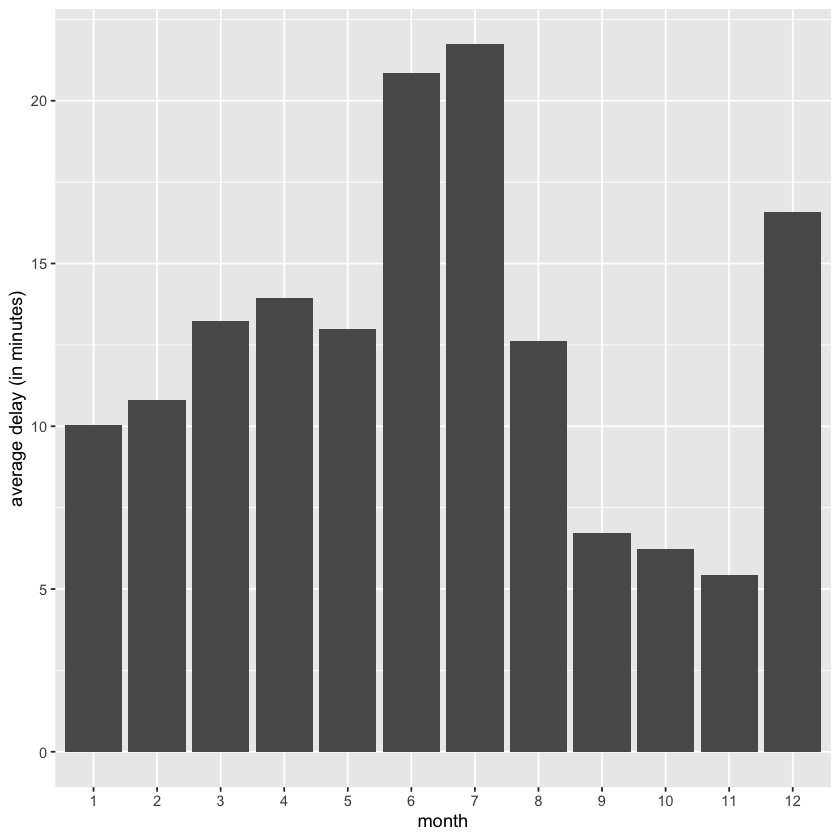

In [22]:
group_by(flights, month) %>%
    summarize(delay = mean(dep_delay, na.rm = TRUE)) %>%
    ggplot() +
        geom_bar(mapping = aes(x=factor(month), y = delay), stat = "identity") +
        labs(x = "month", y = "average delay (in minutes)")

How about a bar chart of mean arrival delay by destination airport for the top 10 airports that have the highest traffic volume?  We will use `group_by`, `summarize`, `arrange`, `slice`, and `ggplot`.

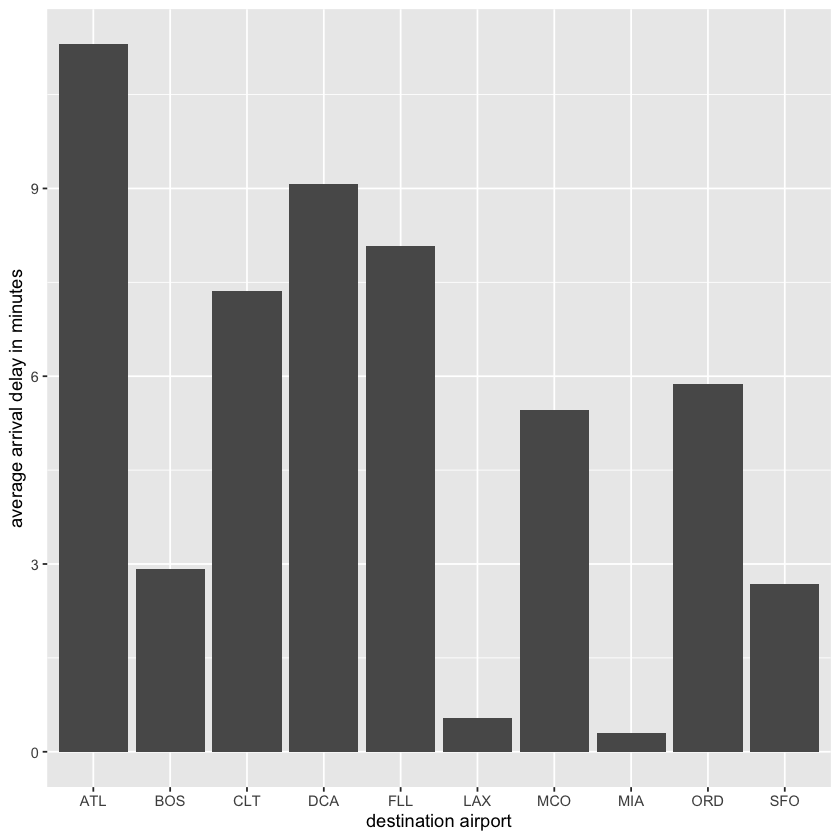

In [23]:
group_by(flights, dest) %>%
    summarize(mean_delay = mean(arr_delay, na.rm=TRUE),count = n()) %>%
    arrange(desc(count)) %>%
    slice(1:10) %>%
    ggplot() +
        geom_bar(mapping = aes(x = dest, y = mean_delay), stat = "identity") +
        xlab("destination airport") +
        ylab("average arrival delay in minutes")

Now, let us try to get a scatter plot of airport distance vs average arrival delay after grouping by destination airport。  We will also superimpose the scatter plot with a smoothed plot

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


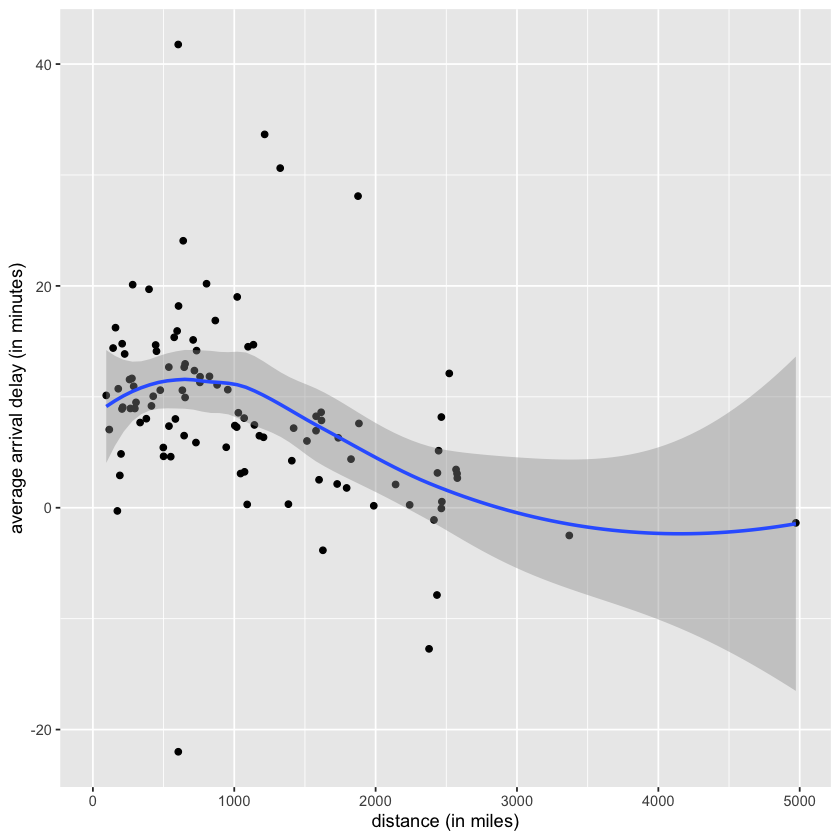

In [24]:
group_by(flights, dest) %>%
    summarize(mean_distance = mean(distance, na.rm=TRUE),mean_delay = mean(arr_delay, na.rm=TRUE)) %>%
    ggplot(mapping = aes(x = mean_distance, y = mean_delay)) +
        geom_point() +
        geom_smooth() +
        xlab("distance (in miles)") +
        ylab("average arrival delay (in minutes)")

# Find the worst flight with the worst delay for each day

In [14]:
flights_sml <- select(flights,year:day,ends_with("delay"),distance, air_time)

In [15]:
print(flights_sml)

# A tibble: 336,776 x 7
    year month   day dep_delay arr_delay distance air_time
   <int> <int> <int>     <dbl>     <dbl>    <dbl>    <dbl>
 1  2013     1     1         2        11     1400      227
 2  2013     1     1         4        20     1416      227
 3  2013     1     1         2        33     1089      160
 4  2013     1     1        -1       -18     1576      183
 5  2013     1     1        -6       -25      762      116
 6  2013     1     1        -4        12      719      150
 7  2013     1     1        -5        19     1065      158
 8  2013     1     1        -3       -14      229       53
 9  2013     1     1        -3        -8      944      140
10  2013     1     1        -2         8      733      138
# … with 336,766 more rows


In [63]:
flights_sml %>% group_by(year,month,day) %>% filter(rank(desc(arr_delay))<2) %>% print()

# A tibble: 366 x 7
# Groups:   year, month, day [365]
    year month   day dep_delay arr_delay distance air_time
   <int> <int> <int>     <dbl>     <dbl>    <dbl>    <dbl>
 1  2013     1     1       853       851      184       41
 2  2013     1     2       337       368     2586      346
 3  2013     1     3       291       285      765      125
 4  2013     1     4       288       276      708      109
 5  2013     1     5       327       308     1010      158
 6  2013     1     6       163       175     1167      200
 7  2013     1     7       366       368     1076      153
 8  2013     1     8       188       184      229       43
 9  2013     1     9      1301      1272     4983      640
10  2013     1    10      1126      1109      719      111
# … with 356 more rows


# Summary thus far
Before we move on to the next part of the book, I want to spend some time summarizing and tying together the main ideas from the past few lectures. In chapter 5 we learned about five types of operations for altering data tibbles:
* `filter()`: drop rows from a data table based on certain logical conditions.
* `select()`: keep *columns* in a data table by name, range, or logical conditions.
* `arrange()`: sort / reorder the rows of a data table.
* `mutate()`: generate new columns in a data table by applying functions to the existing ones.
* `group_by()` / `summarize()`: group rows together based on one or more variables, and compute summary statistics within each group.

#### `filter()` vs `select()`
Some students were mixing up the use of `filter()` and `select()`.

`filter()` selects the rows based on some specific criterion

`select()` selects the columns of your data set

### Common Error `` and ' ' and "  "

In [25]:
# filter(flights, carrier == `UA`)  %>% print # produces an error: compares the column carrier to the (nonexistent) column UA

filter(flights, carrier == 'UA')  %>% print

# A tibble: 58,665 × 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      554            558        -4      740            728
 4  2013     1     1      558            600        -2      924            917
 5  2013     1     1      558            600        -2      923            937
 6  2013     1     1      559            600        -1      854            902
 7  2013     1     1      607            607         0      858            915
 8  2013     1     1      611            600        11      945            931
 9  2013     1     1      623            627        -4      933            932
10  2013     1     1      628            630        -2     1016            947
# … with 58,655 more rows, a

### `=` versus `==`

Remember that `=` and `==` mean different things. The former is used for assignment and to pass keyword parameters to functions. The latter is used to test for equality and returns either `TRUE` or `FALSE`.

In [26]:
#filter(flights, carrier = "UA") %>% print()
filter(flights, carrier == "UA") %>% print()

# A tibble: 58,665 × 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      554            558        -4      740            728
 4  2013     1     1      558            600        -2      924            917
 5  2013     1     1      558            600        -2      923            937
 6  2013     1     1      559            600        -1      854            902
 7  2013     1     1      607            607         0      858            915
 8  2013     1     1      611            600        11      945            931
 9  2013     1     1      623            627        -4      933            932
10  2013     1     1      628            630        -2     1016            947
# … with 58,655 more rows, a

### Vector versus column versus data table
There is particular confusion about when it is appropriate to use vectors, columns and data tables. We will be discussing these concepts at greater length in the coming weeks, but here are some essentials that you should know:

**Vectors** in R contain multiple values. You create vectors using the `c()` function. If you do neglect to do this, R will produce an error and/or do the wrong thing. Some examples of this I saw include:
```{r}
a = factor(b, levels=1, 2, 3, 4, 5) ## wrong
a = factor(b, levels=(1, 2, 3, 4, 5)) ## wrong
a = factor(b, levels=c(1, 2, 3, 4, 5)) ## correct
```

Vectors have a particular type, and all the entries of the vector must be of that same type; if they are not R will convert them to be.

In [27]:
c(1,2,'a')  # conversion to string
c(T, T, factor('a'))  # conversion to int

[1] "1" "2" "a"

[1] 1 1 1

You can think of a data table as a list of vectors. Each column has its own vector. To access a vector of values stored in a column in R, we traditionally use the `$` operator:

In [30]:
flights$tailnum %>% head()

[1] "N14228" "N24211" "N619AA" "N804JB" "N668DN" "N39463"

If working inside one of the `dplyr` functions like `mutate()`, `filter()`, etc., the dataset is specified by the first parameter. So you don't need to use the `$` operator, just specify the column name:
```{r}
filter(flights, flights$arr_delay < 10)  # wrong (although it will work)
filter(flights, arr_delay < 10)  # correct
```

Even though they contain the same information, a column vector is *not the same* as a table containing only that column:

In [31]:
head(flights$arr_time)  # <---- vector     
# is different from...
head(select(flights, arr_time)) # <---- data table

[1]  830  850  923 1004  812  740

arr_time
<int>
830
850
923
1004
812
740


## Visualization Distributions


The file `bil.RData` contains a dataset on [billionaires](https://think.cs.vt.edu/corgis/csv/billionaires/billionaires.html): who they are, where they are from, how & when they made their fortune, etc.

In [32]:
load('bil.RData')
bil <- as_tibble(bil)
print(bil)
#print(bil)

# A tibble: 2,614 × 22
     age category  citizenship company.name  company.type `country code` founded
   <int> <chr>     <chr>       <chr>         <chr>        <chr>            <int>
 1    -1 Financial Saudi Arab… Rolaco Tradi… new          SAU               1968
 2    34 Financial United Sta… Fidelity Inv… new          USA               1946
 3    59 Non-Trad… Brazil      Companhia Br… new          BRA               1948
 4    61 New Sect… Germany     Ratiopharm    new          DEU               1881
 5    -1 Financial Hong Kong   Swire         new          HKG               1816
 6    -1 Traded S… Bahrain     YBA Kanoo     new          BHR               1890
 7    -1 New Sect… Japan       Otsuka Holdi… new          JPN               1921
 8    -1 Traded S… Japan       Sony          new          JPN               1946
 9    66 Financial Japan       Mori Building new          JPN               1959
10    -1 Traded S… France      Chanel        new          FRA               1909
# … w

## Visualizing discrete distributions
We already saw how to visualize the distribution of a discrete random variable: make a bar plot. For example, in the `billionaire` data set, `region` is categorical:

In [34]:
colnames(bil) %>% print

 [1] "age"               "category"          "citizenship"      
 [4] "company.name"      "company.type"      "country code"     
 [7] "founded"           "from emerging"     "gdp"              
[10] "gender"            "industry"          "inherited"        
[13] "name"              "rank"              "region"           
[16] "relationship"      "sector"            "was founder"      
[19] "was political"     "wealth.type"       "worth in billions"
[22] "year"             


Say we are interested in the distirbution of the variable `region`.  What should we plot to visualize this? 

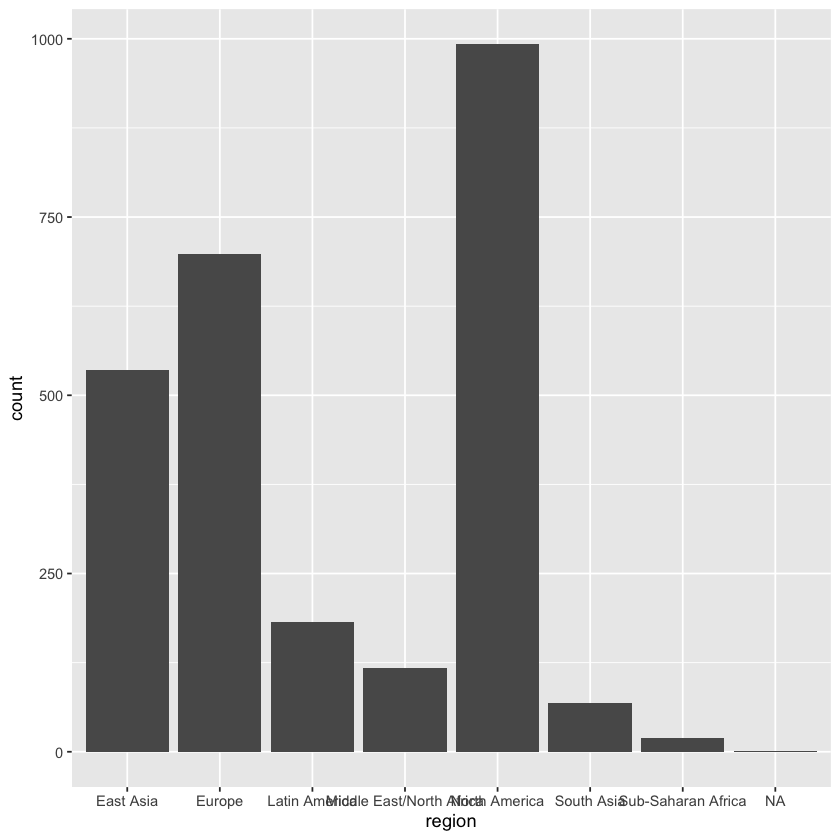

In [35]:
ggplot(data = bil) + geom_bar(mapping = aes(x = region))

You see that there are NAs in the variable `region`. You could also combine this with what you have learnt by removing the NAs first before plotting.

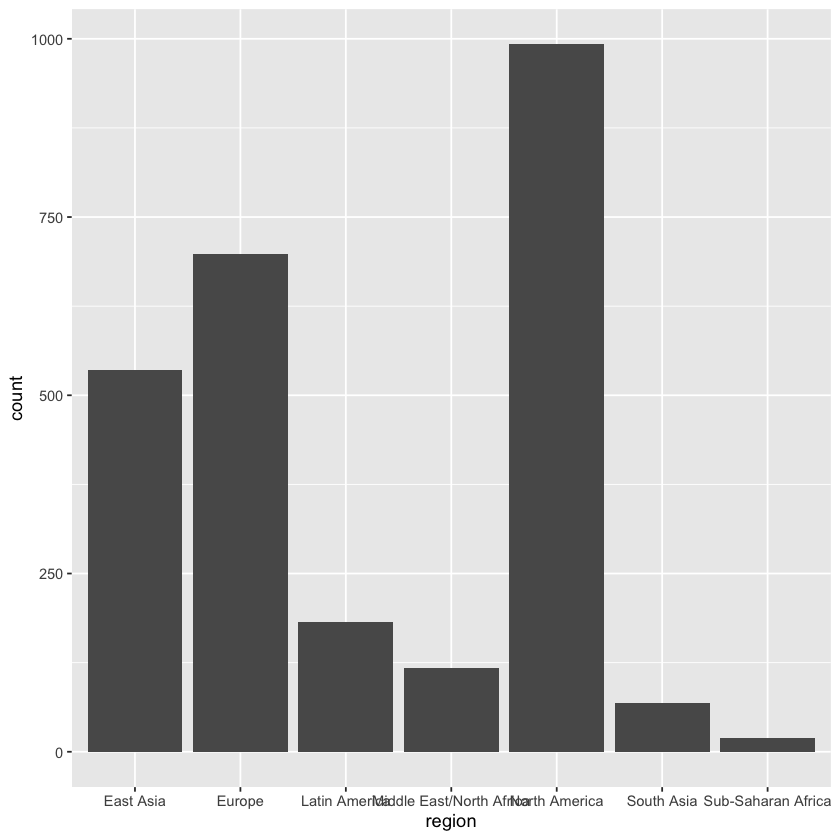

In [37]:
filter(bil, !is.na(region)) %>% ggplot() + geom_bar(mapping = aes(x = region)) 

## Continuous random variables
We cannot directly use a bar plot to visualize a continuous random variable, because every observation potentially has a different value. Instead we create a **histogram**. The command to do this is **geom_histogram**.

Let's visualize the distribution of wealth among billionaires. 

In [39]:
colnames(bil) %>% print

 [1] "age"               "category"          "citizenship"      
 [4] "company.name"      "company.type"      "country code"     
 [7] "founded"           "from emerging"     "gdp"              
[10] "gender"            "industry"          "inherited"        
[13] "name"              "rank"              "region"           
[16] "relationship"      "sector"            "was founder"      
[19] "was political"     "wealth.type"       "worth in billions"
[22] "year"             


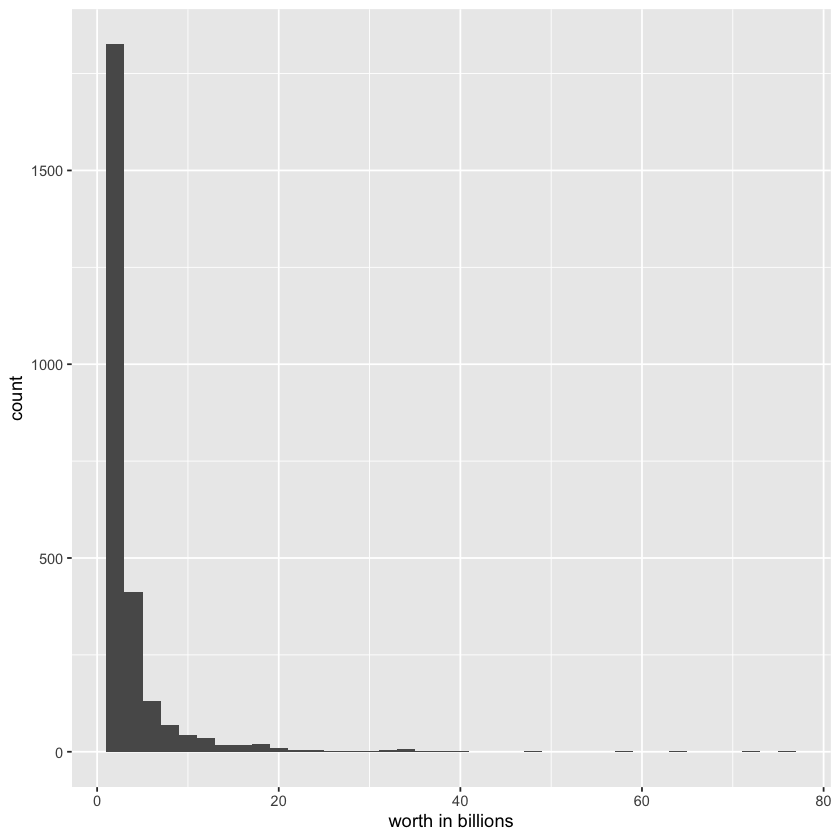

In [38]:
bil %>% ggplot +
    geom_histogram(mapping = aes(x = `worth in billions`), 
                   binwidth = 2)

Most billionaires are worth about \\$1-5b. However, the distribution has a "long tail": there are some billionaires who are worth as much as \\$60-80b. Interestingly, the income distribution among billionaires looks quite a bit like the income distribution in society as a whole. Even the .001% have their 1%.

A histogram is basically a bar plot where the continuous random variable has been *quantized* into one of a finite number of values.

## Typical and Atypical Values
In EDA, it is a good idea to try and get a sense of what constitutes a "typical" value in your data. Let's look at the disribution of the ages of billionaires:

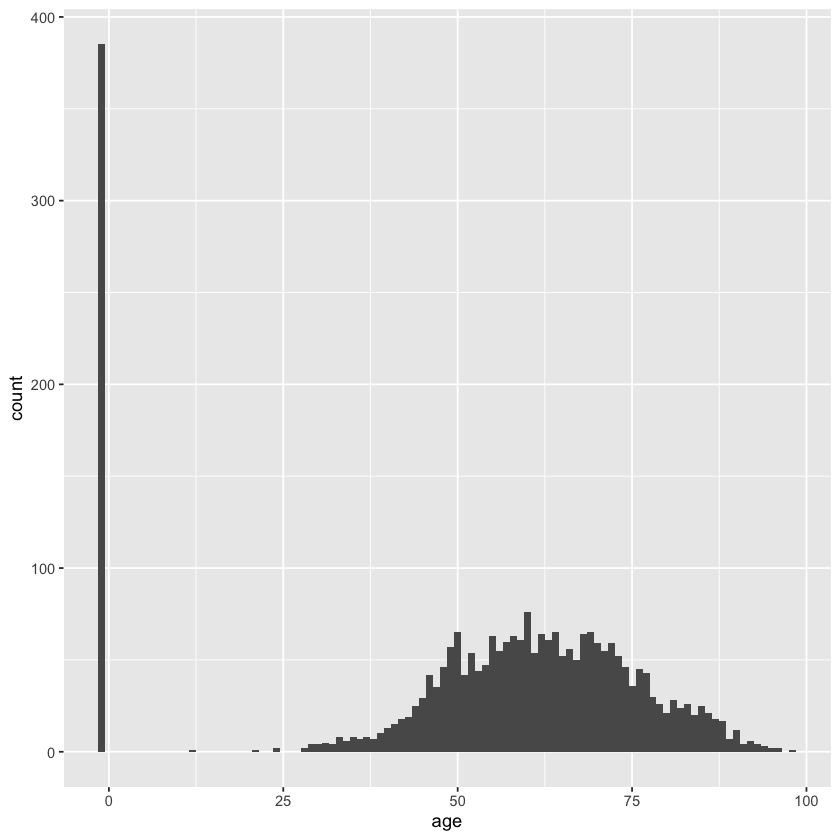

In [41]:
bil %>% ggplot() +
    geom_histogram(mapping = aes(x = age), binwidth = 1)

Typical values of `age` in these data range from about 30 to 90. We see a very unusual spike around zero. Let us try to investigate more by filtering the data set to contain only rows with age less than 10.   

In [42]:
filter(bil, age < 10) %>% arrange(age) %>% print

# A tibble: 385 × 22
     age category  citizenship company.name  company.type `country code` founded
   <int> <chr>     <chr>       <chr>         <chr>        <chr>            <int>
 1    -1 Financial Saudi Arab… Rolaco Tradi… new          SAU               1968
 2    -1 Financial Hong Kong   Swire         new          HKG               1816
 3    -1 Traded S… Bahrain     YBA Kanoo     new          BHR               1890
 4    -1 New Sect… Japan       Otsuka Holdi… new          JPN               1921
 5    -1 Traded S… Japan       Sony          new          JPN               1946
 6    -1 Traded S… France      Chanel        new          FRA               1909
 7    -1 Non-Trad… Mexico      Groupo IUSA   new          MEX               1939
 8    -1 Financial Mexico      Pulsar Inter… new          MEX               1981
 9    -1 Traded S… Netherlands Heineken Int… new          NLD               1864
10    -1 NA        United Sta… MBNA          subsidiary   USA               1982
# … wit

These represent missing data where we do not know the person's age. We'll fix this by *recoding* all values of -1 to `NA`:

In [43]:
 bil <- mutate(bil, age = na_if(age, -1))

The `na_if(a,b)` function as setting a to be equal to `NA` if `a==b`.

A good way to get a sense of typical values is by looking at percentiles. The $p$th percentile of a column is the number $x$ for which $p$% of the values are less than or equal to $x$. The best known example is the *median*: half the values are below the median.

In [44]:
q <- quantile(bil$age, probs=c(.01, .5, .99), na.rm=T)
print(q)

   1%   50%   99% 
32.28 62.00 90.00 


This tells us that 98% of the billionaires are between 32 and 90. Let us redo the visualization with extreme values filtered out.

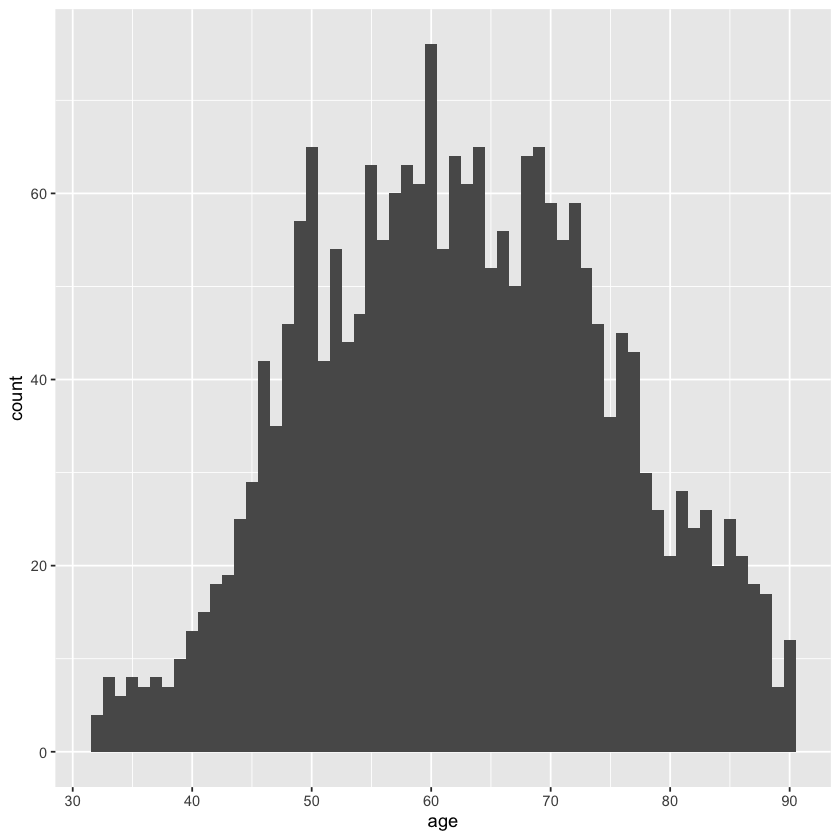

In [45]:
bil %>%  filter(between(age,32,90))  %>%  ggplot() +
    geom_histogram(mapping = aes(x = age), binwidth = 1)